In [29]:
from glob import glob
import matplotlib.pyplot as plt
import os
import os.path
import configparser 
import requests

In [30]:
%pwd

'C:\\Users\\mauri\\OneDrive - OST\\Studium\\Semester 6 (Final)\\MALE\\opendatasg\\notebooks'

In [31]:
def get_traktandierte_geschaefte():
    config = configparser.ConfigParser()
    config.read('../config.ini', encoding='utf-8')
    print(list(config.keys()))
    basedir = config['Verzeichnisse']['basedir']
    r = requests.get(url, allow_redirects=True)
    savepath = os.path.join(basedir,'input')
    fullfilename = os.path.join(savepath,'traktandierte-geschaefte-sitzungen-stadtparlament-stgallen.csv')
    with open(fullfilename, 'wb') as fh:
        fh.write(r.content)
    print(f'wrote to {fullfilename}.')
    inputcsv = pd.read_csv(fullfilename,sep=';')
    print(inputcsv.head())

In [32]:
get_traktandierte_geschaefte()

['DEFAULT', 'Verzeichnisse']


NameError: name 'requests' is not defined

In [33]:
%pwd

'C:\\Users\\mauri\\OneDrive - OST\\Studium\\Semester 6 (Final)\\MALE\\opendatasg\\notebooks'

In [36]:
 config = configparser.ConfigParser()
config.read('../config.ini', encoding='utf-8')
print(list(config.keys()))
config

['DEFAULT', 'Verzeichnisse']


In [37]:
list(config['Verzeichnisse'].keys())
config['Verzeichnisse']['verarbeitungspfad']

'C:\\Temp\\Stadt_SG'

In [52]:
ScratchPfad = r'C:\Temp\Stadt_SG2'
Text_Pfad = os.path.join(ScratchPfad,'Text')
Text_Pfad_txt = os.path.join(Text_Pfad,r'*\*.txt')
Download_Pfad = os.path.join(ScratchPfad,'downloads')
download_filename = os.path.join(Download_Pfad,'traktandierte-geschaefte-sitzungen-stadtparlament-stgallen.csv')
filelist = glob(Text_Pfad_txt)
#filelist = glob(r'/home/beat/male-fs22/data/text/*/*.txt')
len(filelist)

5445

In [53]:
i=0

In [54]:
import codecs
data = {}
for file in filelist:
    try:
        with codecs.open(file,'r',encoding='utf-8') as fh:
            lines = fh.readlines()
        text = ''.join(lines)
        data[file]=text
    except FileNotFoundError as err:
        continue

In [55]:
len(data)

5445

In [56]:
data_dict = {os.path.basename(k):v for k,v in data.items()}

In [57]:
import pandas as pd
import numpy as np
index = np.arange(len(data_dict))
df = pd.DataFrame(data_dict,index=index)

In [58]:
#df.to_feather('textdata.feather') #Memory Error?
#df.to_csv('textdata.csv')

In [59]:
from collections import defaultdict
d = defaultdict(lambda :0)
d[55]

0

In [60]:
d[55]+=1
d[55]

1

In [61]:
import codecs
import pandas as pd
import numpy as np
def load_documents_to_df(filelist):
    #data = {}
    IDcountDict = defaultdict(lambda :0)
    AllDocsDict = defaultdict(lambda :'')
    for file in filelist:
        Geschaefts_ID = os.path.basename(os.path.split(file)[0])
        IDcountDict[Geschaefts_ID]+=1
        try:
            with codecs.open(file,'r',encoding='utf-8') as fh:
                lines = fh.readlines()
            text = ''.join(lines)
            #data[file]=text
            AllDocsDict[Geschaefts_ID]+=text
        except FileNotFoundError as err:
            continue    
    #data_dict = {os.path.basename(k):v for k,v in data.items()}
    index = np.arange(len(AllDocsDict))
    AllDocsser = pd.Series(AllDocsDict)
    return AllDocsser,pd.Series(IDcountDict)

In [62]:
AllDocsser,NrDocumentsPerGeschaeft= load_documents_to_df(filelist)
AllDocsser.head()

0013105d702a4ea7b4609cab653701d9     C Stadt St.Gallen Stadtrat Vorlage Stadtparla...
0030fbaf6f1244428752ec79f0ea707f    C Stadt St.Gallen Stadtrat Vorlage an den Gros...
003357f86def402fa435e330c8c72aca     Stadt St.Gallen Stadtrat Vorlage Stadtparlame...
0042fedddd4447eb9b90c6eb21f88e6c    (cid:1) Stadt St.Gallen Fraktionen Vorlage Sta...
00562d0127a144df91d667ccefa12911     Stadt St.Gallen Stadtrat Vorlage Stadtparlame...
dtype: object

<AxesSubplot:>

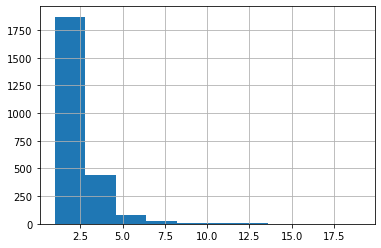

In [63]:
NrDocumentsPerGeschaeft.hist()

In [35]:
dftrain = pd.read_csv('../data/Open-Data-SG/train.csv',index_col='Id')
dftrain.head()

,X1,y
Id,,
0,Sanierung von zwei Kindergärten und zwei Doppe...,5
1,Erweiterung der Freihandbibliothek an der Kath...,3
2,Wahl einer nichtständigen Kommission zur Vorbe...,10
3,St.Gallen – Felsenstrasse; Kappellenstrasse bi...,10
4,Schutzverordnung Goldachtobel,12


In [38]:
df = pd.read_csv(download_filename,sep=';')
df.head()

,nr,Sitzungs_ID,Link zur Sitzung,Legislatur,Jahr,Bezeichnung,Sitzungsdatum,Freigabe,Ort,Zeit,...,Aktenplan Ebene5,Aktenplan Ebene6,Dokumentendatum,Dokumententitel,Traktandentitel,Vorberatende Kommission,Traktandenstatus,Traktandennummer,Geschaeft_GUID,Traktandum_GUID
0,2014-05-06T00:00:00.000-2,00731bb5b58e4aa0a731370c10e23550,https://www.stadt.sg.ch/home/verwaltung-politi...,01.01.2013 - 31.12.2016,2014,16. Sitzung Stadtparlament,2014-05-06,Öffentlich,Waaghaus,16:00,...,NaN,NaN,2014-05-13,Protokoll Stadtparlament 6. Mai 2014,Neubau des Doppelkindergartens Oberzilstrasse 11,DBP,behandelt,2.0,00e39bd219f34918a9cbc202682fd945,b79087c371a84e198ef60fd4865e3325
1,2006-11-28T00:00:00.000-6,02fa0fc0d010458db69ae0b3bfa0fc23,NaN,01.01.2005 - 31.12.2008,2006,30. Sitzung Stadtparlament,2006-11-28,Öffentlich,Waaghaus,NaN,...,Stadtparlament: Interpellationen,NaN,2006-11-28,Protokoll StParl 28.11.2006,Interpellation Thomas Schwager: Massnahmenplan...,NaN,behandelt,6.0,e233e6d6c9124f0e920f226db79f3124,e7a2cc47dc6c4a28a37408430fbb3861
2,2006-11-28T00:00:00.000-2,02fa0fc0d010458db69ae0b3bfa0fc23,NaN,01.01.2005 - 31.12.2008,2006,30. Sitzung Stadtparlament,2006-11-28,Öffentlich,Waaghaus,NaN,...,NaN,NaN,2006-11-28,Protokoll StParl 28.11.2006,Energieversorgung Stadion / Einkaufszentrum We...,NaN,behandelt,2.0,636e379219164de0b5c766aad9e07936,0e42ce9327ac47ecadb2d6f0e09ddb72
3,2017-10-24T00:00:00.000-12,03d66ee79146403394935bb0b5957fe6,https://www.stadt.sg.ch/home/verwaltung-politi...,01.01.2017 - 31.12.2020,2017,11. Sitzung Stadtparlament Aufräumsitzung,2017-10-24,Öffentlich,NaN,16:00,...,Stadtparlament: Interpellationen,NaN,2017-10-30,Beschlussprotokoll Stadtparlament 24.10.2017 i...,Interpellation Jennifer Deuel und Karl Schimke...,DBF,behandelt,12.0,cd288811f98e428d92a9b622f481303c,d354a67336c847b1a78a86e375f07b12
4,2017-10-24T00:00:00.000-4,03d66ee79146403394935bb0b5957fe6,https://www.stadt.sg.ch/home/verwaltung-politi...,01.01.2017 - 31.12.2020,2017,11. Sitzung Stadtparlament Aufräumsitzung,2017-10-24,Öffentlich,NaN,16:00,...,NaN,NaN,2017-10-30,Beschlussprotokoll Stadtparlament 24.10.2017 i...,"Fuss- und Veloverkehr, Sofortmassnahmen (2018 ...",LBK,behandelt,4.0,ac6bcd93e9a94bdd9e6e49562bbf0a6f,67ebed60a3534c04b760be80c71f53b9


Die ID in AllDocsser ist die `Geschaeft_GUID`:

In [39]:
df.Sitzungs_ID.map(lambda s: 'c3070ef262404e1e8069112dd2d15d1b' in s).any()

False

In [40]:
df.Geschaeft_GUID.dropna().map(lambda s: 'c3070ef262404e1e8069112dd2d15d1b' in s).any()

True

In [41]:
dftrain.X1.iloc[0]

'Sanierung von zwei Kindergärten und zwei Doppelkindergärten; Rahmenkredit'

In [42]:
def find_titel(df,titel):
    LA = df.Traktandentitel.dropna().map(lambda s: titel in s)
    return LA[LA].index

In [43]:
titel = dftrain.X1.iloc[0]
def Finde_DokumentInfo(df,titel,verbose=False):
    indices = find_titel(df,titel)
    if verbose and indices.size>0:
        print(f'Der Titel\n<<<<{titel}>>>\nfindet sich in diesen Dokumenten: {indices.tolist()}')
    return indices
indices = Finde_DokumentInfo(df,dftrain.X1.iloc[11],verbose=True)

Der Titel
<<<<Überbauungsplan und Zonenplanänderung "Fisba Optik">>>
findet sich in diesen Dokumenten: [550]


In [44]:
df.loc[indices].Geschaeft_GUID

550    4a27f52eb0f34190b3d1701d3afd1dc8
Name: Geschaeft_GUID, dtype: object

In [45]:
#Kann natürlich auch passieren:
indices = Finde_DokumentInfo(df,'gibtsnicht')
indices

Int64Index([], dtype='int64')

In [46]:
neue_spalte = []
for irow,row in dftrain.iterrows():
    indices = Finde_DokumentInfo(df,row.X1)
    GUIDs = df.loc[indices].Geschaeft_GUID.unique().tolist()
    neue_spalte.append(GUIDs)

In [47]:
GUIDs

['27f6ffb80dfc412c8014cc4b72b65d19']

In [48]:
neue_spalte = pd.Series(neue_spalte,index=dftrain.index,name='GUIDs')

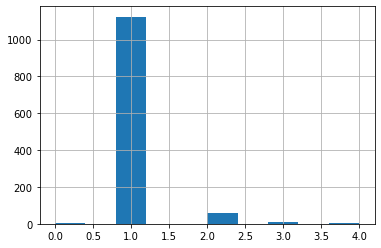

In [49]:
neue_spalte.map(len).hist();

Weil es offensichtlich Geschäfte mit mehreren Dokumenten gibt, können wir die GUIDs nicht als einzelnen String ablegen. 

In [50]:
dftrain['GUIDs']=neue_spalte
dftrain.head()

,X1,y,GUIDs
Id,,,
0,Sanierung von zwei Kindergärten und zwei Doppe...,5,[5c5d97cb5d504af49081116941868858]
1,Erweiterung der Freihandbibliothek an der Kath...,3,[26df226758334cb5bd353a3ddd6fb565]
2,Wahl einer nichtständigen Kommission zur Vorbe...,10,[81554756428a40b69f08b73849e97642]
3,St.Gallen – Felsenstrasse; Kappellenstrasse bi...,10,[7fbf9d1b99f94cf0bc1f2a72778b2032]
4,Schutzverordnung Goldachtobel,12,[a7cf239d72ff4cf6bc5853e54df8492d]


In [64]:
import codecs
def holeTextDateien(GUIDListe):
    Textdateien = set()
    for GUID in GUIDListe:
        filelist = glob(f'{Text_Pfad}{GUID}\*.txt')
        Textdateien|=set(filelist) #Elemente einer Menge hinzufügen
    return Textdateien
def holeText(GUIDListe):
    Textdateien = holeTextDateien(GUIDListe)
    textlist = []
    for Textdatei in Textdateien:
        try:
            with codecs.open(Textdatei,'r',encoding='utf-8') as fh:
                lines = fh.readlines()
            textlist.append(' '.join(lines))
        except FileNotFoundError as err:
            continue
    return textlist

In [ ]:
#Beispiel zu obiger Mengensyntax:
x={1,2}
x|={3}
x

{1, 2, 3}

In [ ]:
dftrain.GUIDs.iloc[0]

['5c5d97cb5d504af49081116941868858']

In [67]:
import codecs
with codecs.open(glob(f'C:\Temp\Stadt_SG\extracts\{GUID}\*.txt')[0],encoding='utf-8') as fh:
    lines = fh.readlines()
lines

NameError: name 'GUID' is not defined

In [68]:
GUID=dftrain.GUIDs.iloc[0][0]
print(GUID)
glob(f'C:\Temp\Stadt_SG\extracts\{GUID}\*.txt')

5c5d97cb5d504af49081116941868858


['C:\\Temp\\Stadt_SG\\extracts\\5c5d97cb5d504af49081116941868858\\Beilage Rahmenkredit Kindergärten 2. Paket 24.08.2020 #1.txt',
 'C:\\Temp\\Stadt_SG\\extracts\\5c5d97cb5d504af49081116941868858\\Sanierung von zwei Kindergärten und zwei Doppelkindergärten; Rahmenkredit 25.06.2020 #0.txt']

In [43]:
holeText(dftrain.GUIDs.iloc[0])

[" Vorlage Stadtparlament Datum 1. September 2020 Beschluss Nr. 4565 Aktenplan 211.15 Kindergärten Sanierung von zwei Kindergärten und zwei Doppelkindergärten; Rahmenkredit Antrag Wir beantragen Ihnen, folgenden Beschluss zu fassen: 1. Der Sanierung von vier Kindergärten (Isenringweg 7, Achslenweg 10, Dreilindenhang 30, Wald- gutstrasse 6a) wird zugestimmt und dafür ein Rahmenkredit von CHF 2'400'000 erteilt. 2. Es wird festgestellt, dass dieser Beschluss nach Art.8 Ziff. 6 lit. a der Gemeindeordnung dem fakulta- tiven Referendum untersteht. 1 Ausgangslage Im Jahre 2013 haben das Schulamt (heute Dienststelle Schule und Musik) und das Hochbauamt den betrieblichen und baulichen Zustand aller städtischen Kindergärten untersucht und beurteilt. Die bauli- che Analyse ergab, dass sich acht Kindergärten in einem baulich schlechten Zustand befinden. Am 23. Februar 2017 legte der Stadtrat dem Stadtparlament eine Vorlage für einen Rahmenkredit im Umfang von CHF 5,1 Mio. für die Sanierung dieser 

In [44]:
dftrain.GUIDs.map(holeTextDateien)

Id
0       {C:\Temp\Stadt_SG\extracts\5c5d97cb5d504af4908...
1       {C:\Temp\Stadt_SG\extracts\26df226758334cb5bd3...
2       {C:\Temp\Stadt_SG\extracts\81554756428a40b69f0...
3       {C:\Temp\Stadt_SG\extracts\7fbf9d1b99f94cf0bc1...
4       {C:\Temp\Stadt_SG\extracts\a7cf239d72ff4cf6bc5...
                              ...                        
1199    {C:\Temp\Stadt_SG\extracts\a8a79292ea104f83aec...
1200    {C:\Temp\Stadt_SG\extracts\ccec1b64359648589f0...
1201    {C:\Temp\Stadt_SG\extracts\d3d7f910e84c4789bfe...
1202    {C:\Temp\Stadt_SG\extracts\3f8bd5b55359488799f...
1203    {C:\Temp\Stadt_SG\extracts\27f6ffb80dfc412c801...
Name: GUIDs, Length: 1204, dtype: object

Text(0.5, 1.0, 'Ich habe nicht alle Dokumente heruntergeladen!')

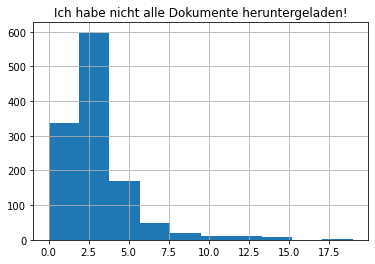

In [45]:
dftrain.GUIDs.map(holeText).map(len).hist()
plt.title('Ich habe nicht alle Dokumente heruntergeladen!')

In [46]:
heruntergeladene = dftrain[dftrain.GUIDs.map(holeText).map(len)>0]
heruntergeladene.head()

,X1,y,GUIDs
Id,,,
0,Sanierung von zwei Kindergärten und zwei Doppe...,5,[5c5d97cb5d504af49081116941868858]
1,Erweiterung der Freihandbibliothek an der Kath...,3,[26df226758334cb5bd353a3ddd6fb565]
2,Wahl einer nichtständigen Kommission zur Vorbe...,10,[81554756428a40b69f08b73849e97642]
3,St.Gallen – Felsenstrasse; Kappellenstrasse bi...,10,[7fbf9d1b99f94cf0bc1f2a72778b2032]
4,Schutzverordnung Goldachtobel,12,[a7cf239d72ff4cf6bc5853e54df8492d]


In [47]:
dftrain['Text']=heruntergeladene.GUIDs.map(holeText).map(lambda l:''.join(l))

In [48]:
dftrain.head() #Ich habe nicht alle Dokumente heruntergeladen- daher ev. in der Textspalte hier nur NaNs sichtbar

,X1,y,GUIDs,Text
Id,,,,
0,Sanierung von zwei Kindergärten und zwei Doppe...,5,[5c5d97cb5d504af49081116941868858],Vorlage Stadtparlament Datum 1. September 202...
1,Erweiterung der Freihandbibliothek an der Kath...,3,[26df226758334cb5bd353a3ddd6fb565],C Stadt St.Gallen Stadtrat Vorlage an das Stad...
2,Wahl einer nichtständigen Kommission zur Vorbe...,10,[81554756428a40b69f08b73849e97642],GGR-Vorlage Ausgliederung sgsw Beilage 5 Model...
3,St.Gallen – Felsenstrasse; Kappellenstrasse bi...,10,[7fbf9d1b99f94cf0bc1f2a72778b2032],St.Georgen-Strass 9 Untere Mühlentreppe Münhel...
4,Schutzverordnung Goldachtobel,12,[a7cf239d72ff4cf6bc5853e54df8492d],Schutzverordnung Goldachtobel August 2019 Ges...


Zeige nur die erfolgreich annotierten GUIDs an:

In [49]:
dfnotnull = dftrain[~ dftrain.Text.isnull()]
dfnotnull.head()

,X1,y,GUIDs,Text
Id,,,,
0,Sanierung von zwei Kindergärten und zwei Doppe...,5,[5c5d97cb5d504af49081116941868858],Vorlage Stadtparlament Datum 1. September 202...
1,Erweiterung der Freihandbibliothek an der Kath...,3,[26df226758334cb5bd353a3ddd6fb565],C Stadt St.Gallen Stadtrat Vorlage an das Stad...
2,Wahl einer nichtständigen Kommission zur Vorbe...,10,[81554756428a40b69f08b73849e97642],GGR-Vorlage Ausgliederung sgsw Beilage 5 Model...
3,St.Gallen – Felsenstrasse; Kappellenstrasse bi...,10,[7fbf9d1b99f94cf0bc1f2a72778b2032],St.Georgen-Strass 9 Untere Mühlentreppe Münhel...
4,Schutzverordnung Goldachtobel,12,[a7cf239d72ff4cf6bc5853e54df8492d],Schutzverordnung Goldachtobel August 2019 Ges...


In [62]:
#dfnotnull.to_feather('data.feather')
dfnotnull.to_csv('../data/Open-Data-SG/train_text.csv')

Wir sollten zumindest stichprobenhaft überprüfen, dass die Titel etwas mit den dazugenommenen Texten zu tun haben!

In [56]:
random_row = dfnotnull.sample(1)
random_row.X1.values[0],random_row.Text.values[0]

('VBSG-Linie 2, Verlängerung Hinterberg; Umwandlung des Versuchsbetriebs in einen regulären Betrieb',
 "VBSG-Linie 2/8 Situation 1:5000 1 Tiefbauamt 5 1 4, 1/ Ahorn e ni Li 10-Min-Takt Linie 7 Hechtacker Friedhof Bruggen 20-Min-Takt 8 e n i L i Moosweiher Bernhardswies 20-Min-Takt 2 e Lini Rosenbüchel Fürstenlandbrücke 8 Gröblistrasse e i n i Bhf. Haggen L 20-Min-Takt Walserstrasse Stocken Rickenweg Haselstrasse 2 Haggen e ni Li 20-Min-Takt Hinterbergstrasse Hinterberg Schlössli Legende: Linie 4 Linie 2: Hauptachse Linie 8: verkehrt nur in Hauptverkehrszeit neue Linienführung bestehende Haltestelle neue Haltestelle bestehende Haltestelle überdacht neue Haltestelle überdacht Haltestelle aufheben / versetzen 0 100 200 m 15. März 2010 / BbC Stadt St.Gallen VBSG-Linie 2 und 8; Verlängerung Hinterberg und Erschliessung Rosenbüchel Fahrplan Anpassung Erschliessung Rosenbüchel ab 12.12.2010 Linie 2: St. Gallen Bhf - Ahorn - Bhf. Haggen - Hinterberg Linie 8: St. Gallen Bhf - Ahorn - Rosenbüche